<a href="https://colab.research.google.com/github/kaylawright26/AAI-540-Internet-Churn-Project/blob/main/EDA_Kayla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA of Internet Churn Data

## Importing Libraries and Dataset

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/internet_service_churn.csv')

## Sanity Checks

In [37]:
df.head()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           72274 non-null  int64  
 1   is_tv_subscriber             72274 non-null  int64  
 2   is_movie_package_subscriber  72274 non-null  int64  
 3   subscription_age             72274 non-null  float64
 4   bill_avg                     72274 non-null  int64  
 5   reamining_contract           50702 non-null  float64
 6   service_failure_count        72274 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          72274 non-null  int64  
 10  churn                        72274 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.1 MB


There are 11 columns of numerical data, looks like there are some missing values that need to be addressed.

In [33]:
df.isnull().sum()

id                                 0
is_tv_subscriber                   0
is_movie_package_subscriber        0
subscription_age                   0
bill_avg                           0
reamining_contract             21572
service_failure_count              0
download_avg                     381
upload_avg                       381
download_over_limit                0
churn                              0
dtype: int64

Remaining contract has quite a few missing values which needs to be addressed carefully. Download average and upload average have the same amount of missing values, these are small but will also need to be addressed.

In [5]:
df.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
id,72274.0,846318.243462,489102.168744,15.00,422216.50,847784.00,1269562.00,1689744.00
is_tv_subscriber,72274.0,0.815259,0.388090,0.00,1.00,1.00,1.00,1.00
is_movie_package_subscriber,72274.0,0.334629,0.471864,0.00,0.00,0.00,1.00,1.00
subscription_age,72274.0,2.450051,2.034990,-0.02,0.93,1.98,3.30,12.80
bill_avg,72274.0,18.942483,13.215386,0.00,13.00,19.00,22.00,406.00
reamining_contract,50702.0,0.716039,0.697102,0.00,0.00,0.57,1.31,2.92
service_failure_count,72274.0,0.274234,0.816621,0.00,0.00,0.00,0.00,19.00
download_avg,71893.0,43.689911,63.405963,0.00,6.70,27.80,60.50,4415.20
upload_avg,71893.0,4.192076,9.818896,0.00,0.50,2.10,4.80,453.30
download_over_limit,72274.0,0.207613,0.997123,0.00,0.00,0.00,0.00,7.00


- Subcription age: There is a negative minimum, which could suggest data entry errors that need to be looked at.
- TV Subscriber: The majority of customers also use the TV services
- Movie package: Much less customers use the movie package, around only 34%.
- Subscription age ranges quite a lot with the average being 2.45 years and the maximum being almost 13 years.
- Bill average: The rage is quite wide in customer billing, but the average is around $19.
- Remaining Contract: (Misspelled column) The rages of contracts this company offers is quite wide but the averahe is around 8/9 months remaning at the time this data was taken.
- Service failure: Some customers experience high levels of service failures as there is a max of 19 instances. Location data would be helpful here.
- Download average/Upload average: The maximum for download and upload is exceptionally high, indicating an extreme outlier or data entry errors.
- Churn: 55.4% of customers seem to have left the service.

In [6]:
df.duplicated().sum()

0

###Graphing Functions

In [8]:
def boxplot_histogram(data, feature, figsize = (12,10), kde = False, bins = None):

  # This function makes a boxplot and a histogram
  # data: dataframe, feature: column of dataframe, figsize: size of figure
  #kde: show curve density, bins: number of bins for the hist plot

  # Setting up figure size, rows
  f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, sharex = True, gridspec_kw = {"height_ratios":(0.25, 0.75)}, figsize = figsize)
  # Creating boxplot
  sns.boxplot(data = data, x = feature, ax = ax_box2, showmeans = True, palette = "winter")
  # Creating histplot
  sns.histplot(
    data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="violet"
    ) if bins else sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)
  # Putting mean on histogram
  ax_hist2.axvline(data[feature].mean(), color = "black", linestyle = "--")
  # Putting median to histogram
  ax_hist2.axvline(data[feature].median(), color = "green", linestyle = "-")

In [9]:
# function to create barplots
def barplot(data, feature, perc=False, cat=None):
    length = len(data[feature])  # find length of the column
    feats = data[feature].nunique()
    if cat is None:
        plt.figure(figsize=(feats + 1, 5))
    else:
        plt.figure(figsize=(cat + 1, 5))
    plt.xticks(rotation=90, fontsize=20) # Graphing the plots
    axis = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:cat].sort_values(),
    )
    for patch in axis.patches: # Making percentages
        if perc == True:
            label = "{:.1f}%".format(
                100 * patch.get_height() / length
            )
        else:
            label = patch.get_height()  # Count levels of the categories
        x = patch.get_x() + patch.get_width() / 2  # Getting width
        y = patch.get_height()  # Getting height
        axis.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
    plt.show()  # show the plot

In [27]:
# This function makes a stacked barplot
# Data: dataset that needs to be graphed
# Predictor: X variable
# Target: Y Variable
def stacked_barplot(data, predictor, target, title, ylabel):
    # Count the predictor
    count = data[predictor].nunique()
    # Sort the target so it can be graphed
    sorter = data[target].value_counts().index[-1]
    # Crosstab computes a simple cross tabulation of two or more factors
    # Cross tabulation of predictor and target
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(by=sorter, ascending=False)
    print(tab1)
    print("-" * 120)
    # Cross tabulation between the variables but normalized for graphing purposes
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(by=sorter, ascending=False)
    # Plotting normalized tabulation
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(loc="lower left", frameon=False,)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.title(title)
    plt.ylabel(ylabel)
    plt.show()

## Univariate/Multivariate Analysis

<ipython-input-9-29a57a8bd321>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axis = sns.countplot(


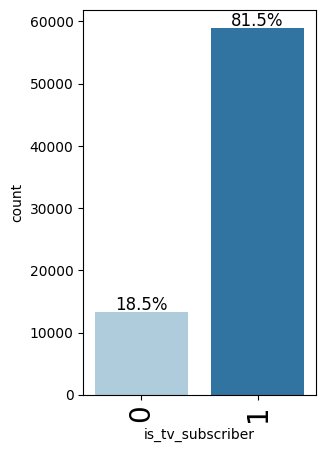

In [12]:
barplot(df, "is_tv_subscriber", perc = True)
plt.show()

<ipython-input-9-29a57a8bd321>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axis = sns.countplot(


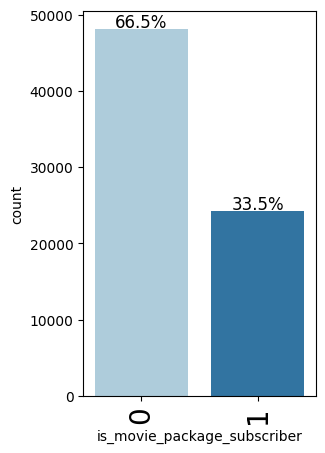

In [13]:
barplot(df, "is_movie_package_subscriber", perc = True)
plt.show()

<ipython-input-8-caf673d2accf>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = data, x = feature, ax = ax_box2, showmeans = True, palette = "winter")


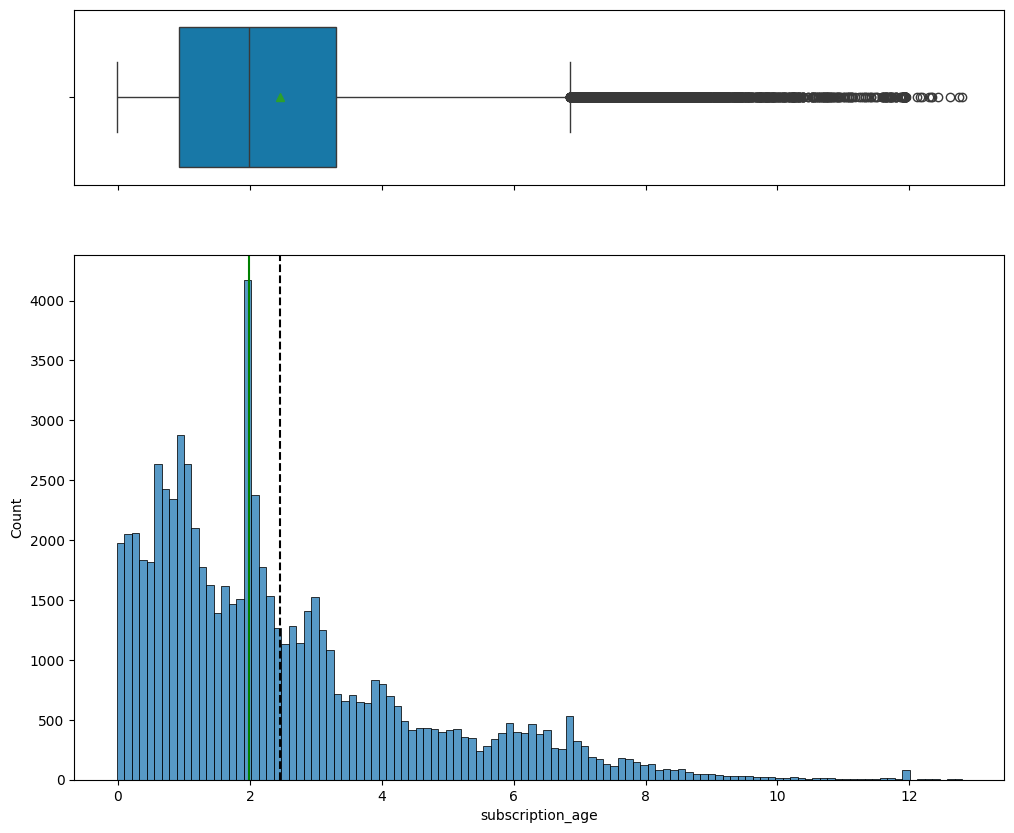

In [14]:
boxplot_histogram(df, "subscription_age")
plt.show()

<ipython-input-8-caf673d2accf>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = data, x = feature, ax = ax_box2, showmeans = True, palette = "winter")


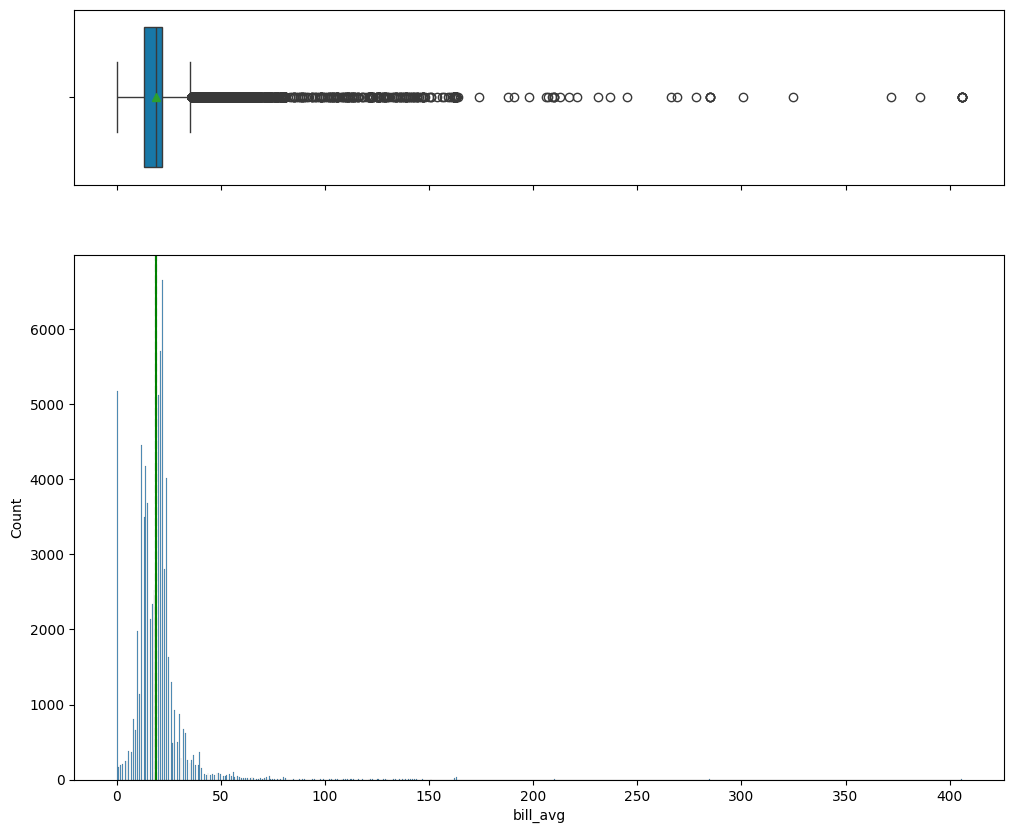

In [15]:
boxplot_histogram(df, "bill_avg")
plt.show()

<ipython-input-8-caf673d2accf>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = data, x = feature, ax = ax_box2, showmeans = True, palette = "winter")


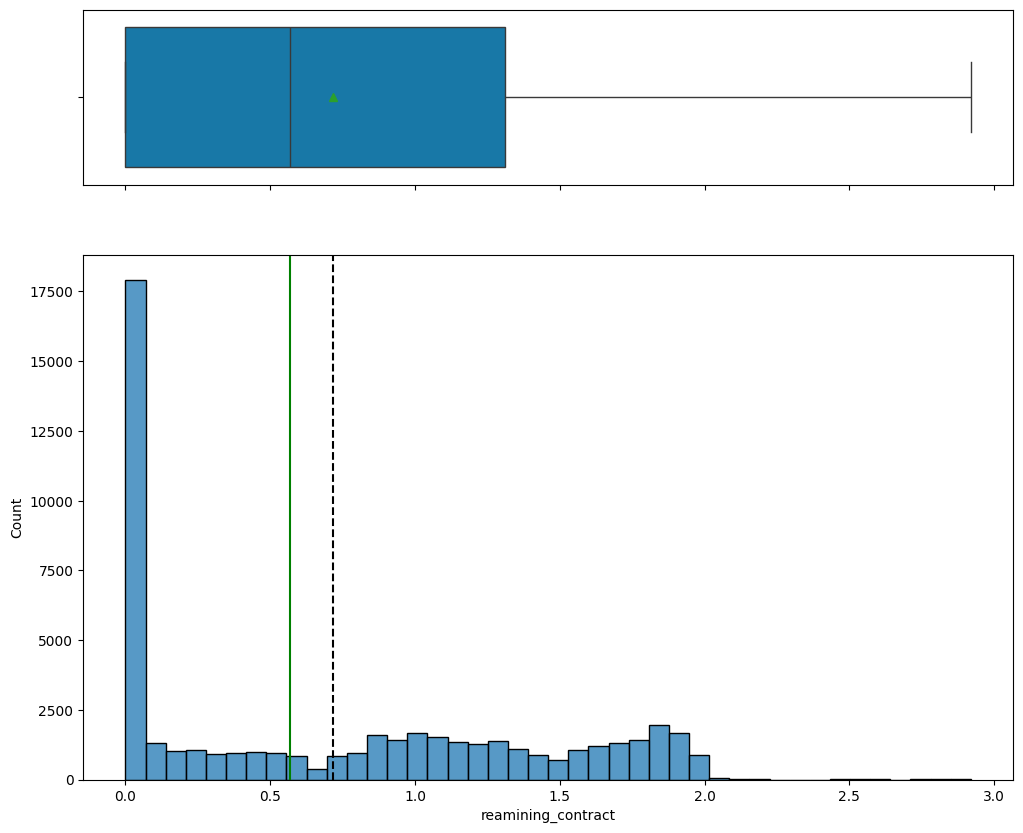

In [16]:
boxplot_histogram(df, "reamining_contract")
plt.show()

<ipython-input-9-29a57a8bd321>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axis = sns.countplot(


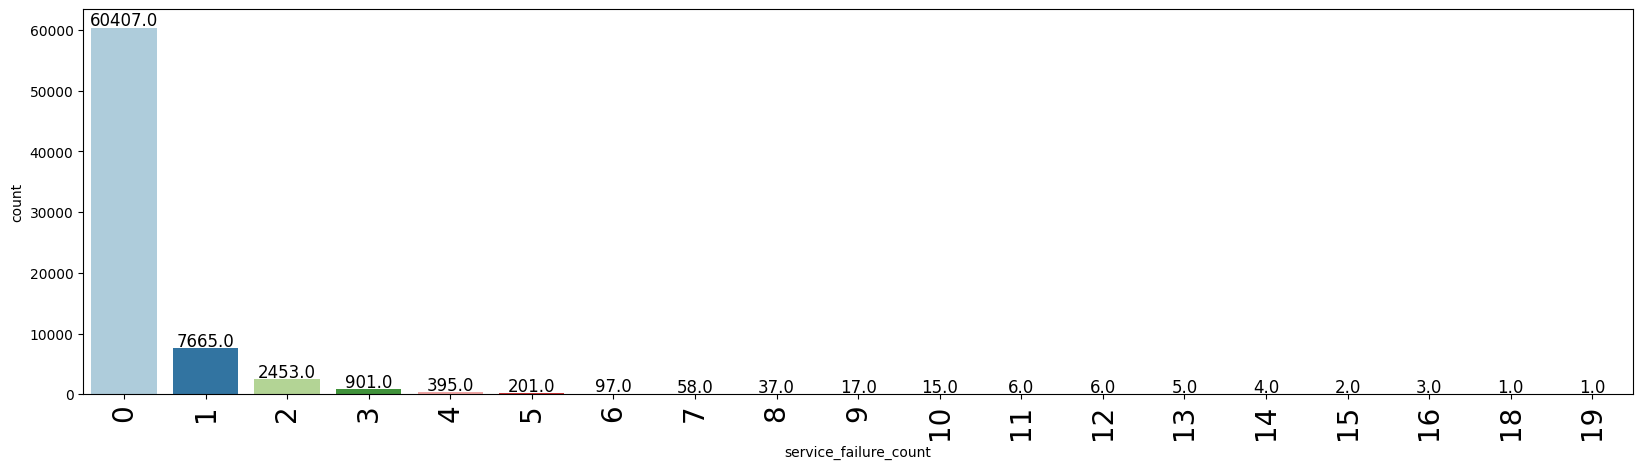

In [18]:
barplot(df, "service_failure_count")
plt.show()

<ipython-input-8-caf673d2accf>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = data, x = feature, ax = ax_box2, showmeans = True, palette = "winter")


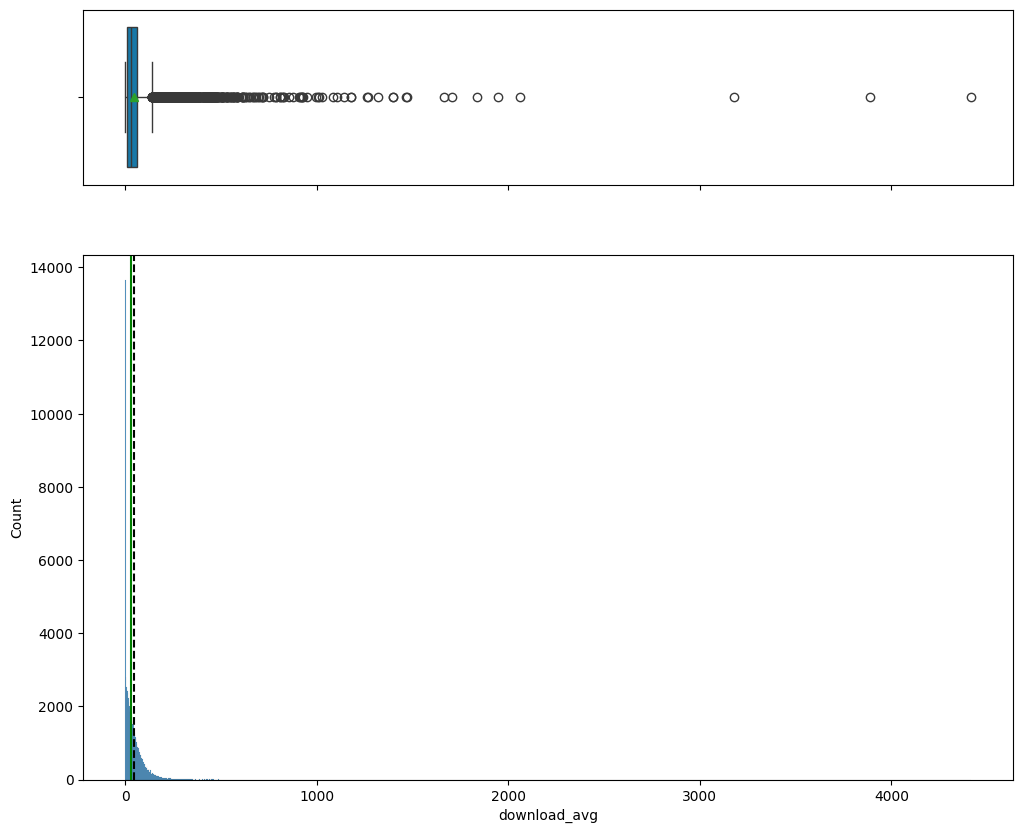

In [19]:
boxplot_histogram(df, "download_avg")
plt.show()

<ipython-input-8-caf673d2accf>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = data, x = feature, ax = ax_box2, showmeans = True, palette = "winter")


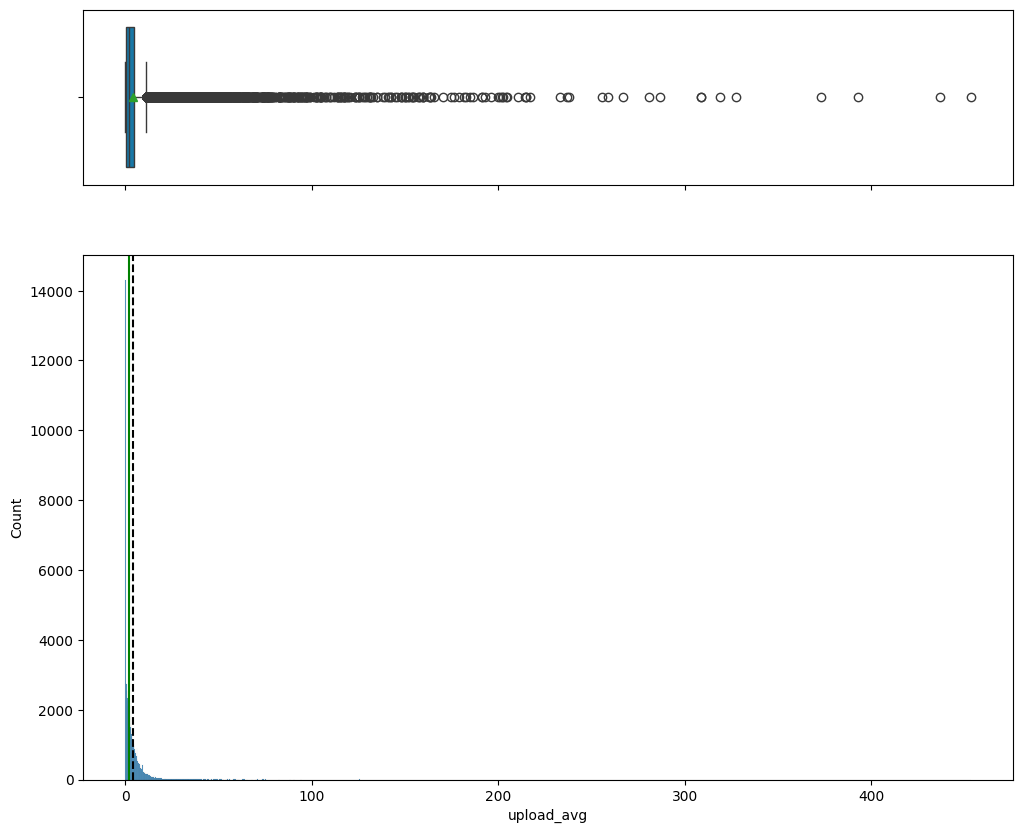

In [20]:
boxplot_histogram(df, "upload_avg")
plt.show()

<ipython-input-9-29a57a8bd321>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axis = sns.countplot(


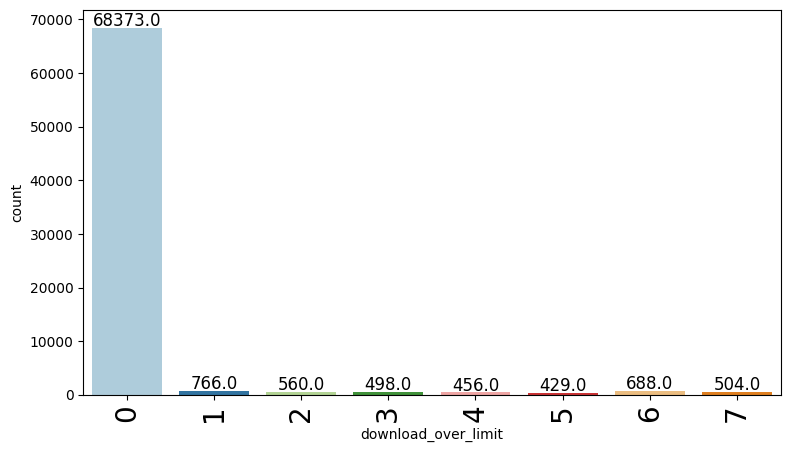

In [22]:
barplot(df, "download_over_limit")
plt.show()

<ipython-input-9-29a57a8bd321>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axis = sns.countplot(


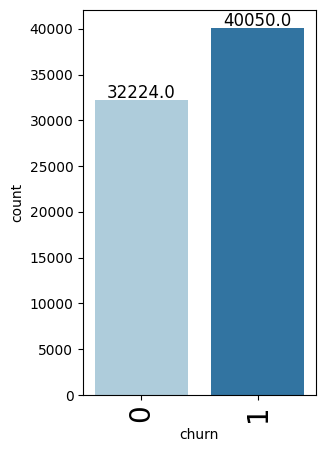

In [23]:
barplot(df, "churn")
plt.show()

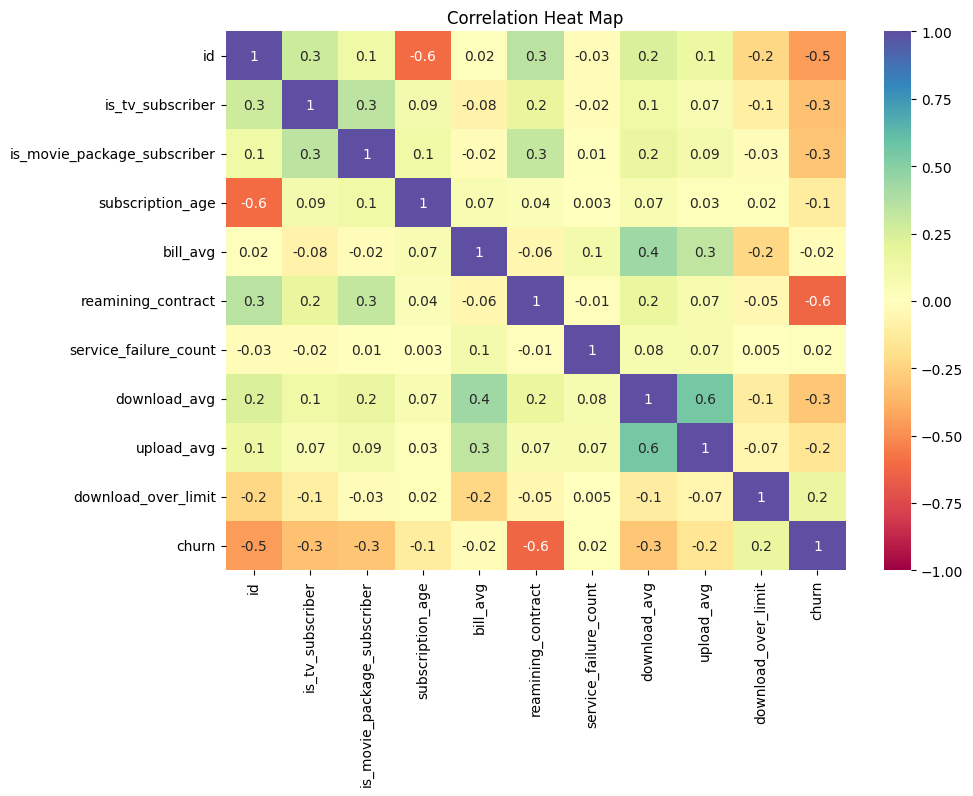

In [24]:
# Making Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".1g", cmap="Spectral")
plt.title("Correlation Heat Map")
plt.show()

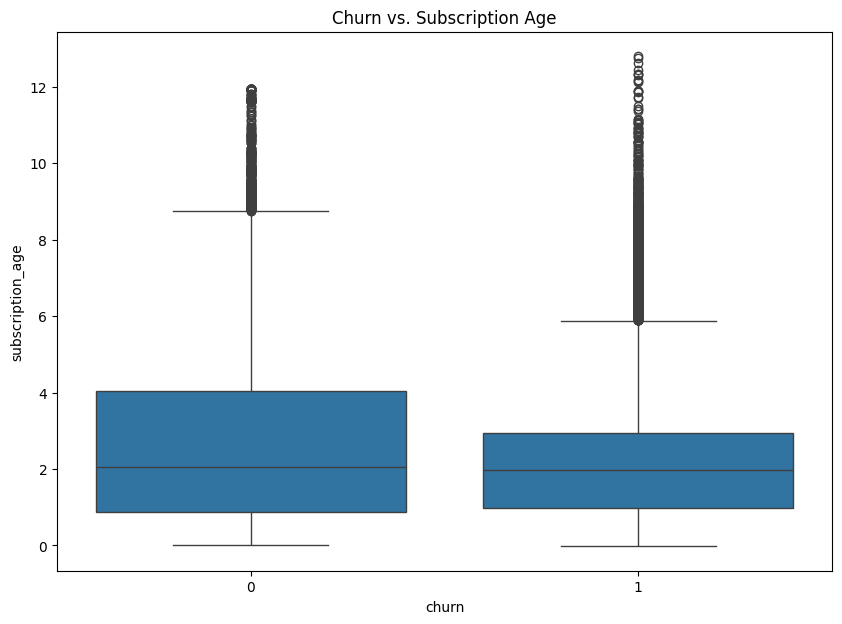

In [25]:
plt.figure(figsize=(10, 7))
sns.boxplot(x="churn", y="subscription_age", data=df)
plt.title("Churn vs. Subscription Age")
plt.show()

is_tv_subscriber      0      1    All
churn                                
All               13352  58922  72274
1                 11966  28084  40050
0                  1386  30838  32224
------------------------------------------------------------------------------------------------------------------------


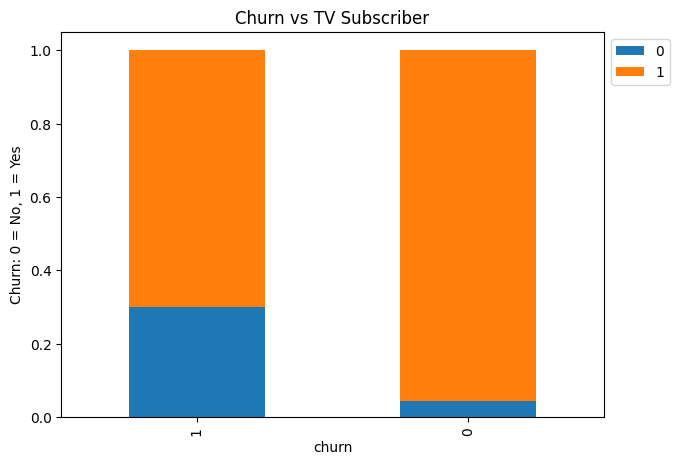

In [28]:
stacked_barplot(df, "churn", "is_tv_subscriber", "Churn vs TV Subscriber", "Churn: 0 = No, 1 = Yes")

is_movie_package_subscriber      0      1    All
churn                                           
All                          48089  24185  72274
0                            16234  15990  32224
1                            31855   8195  40050
------------------------------------------------------------------------------------------------------------------------


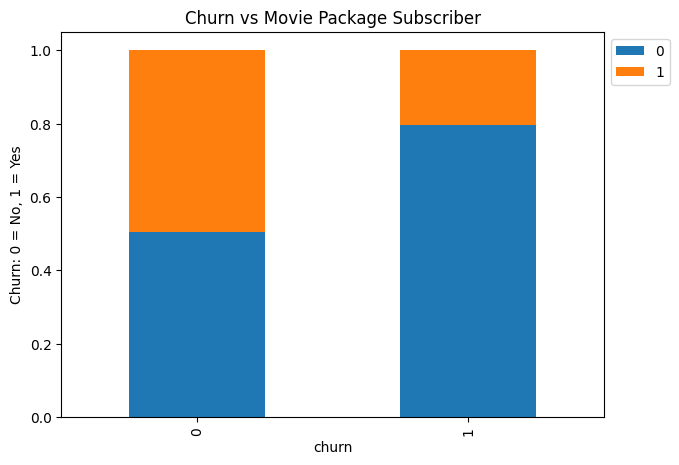

In [29]:
stacked_barplot(df, "churn", "is_movie_package_subscriber", "Churn vs Movie Package Subscriber", "Churn: 0 = No, 1 = Yes")

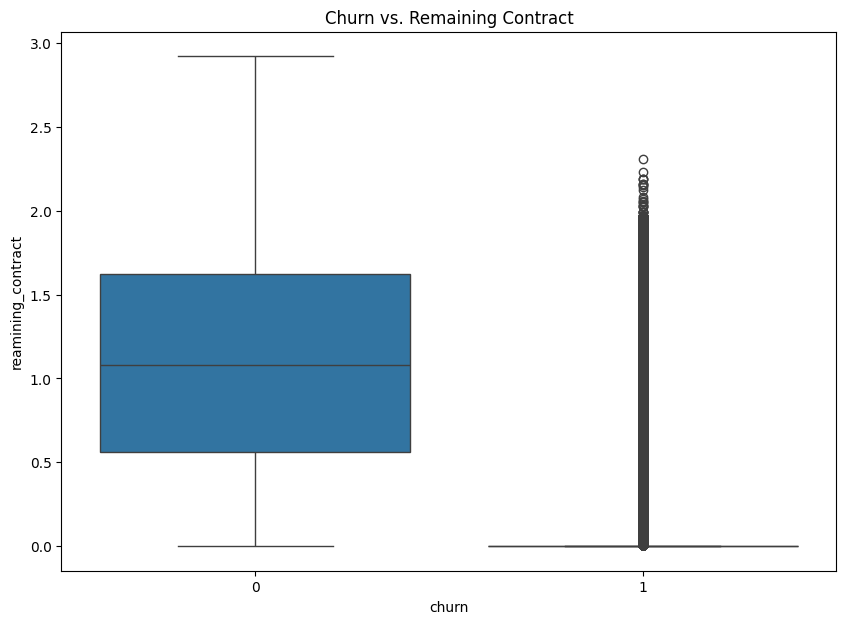

In [32]:
plt.figure(figsize=(10, 7))
sns.boxplot(x="churn", y="reamining_contract", data=df)
plt.title("Churn vs. Remaining Contract")
plt.show()

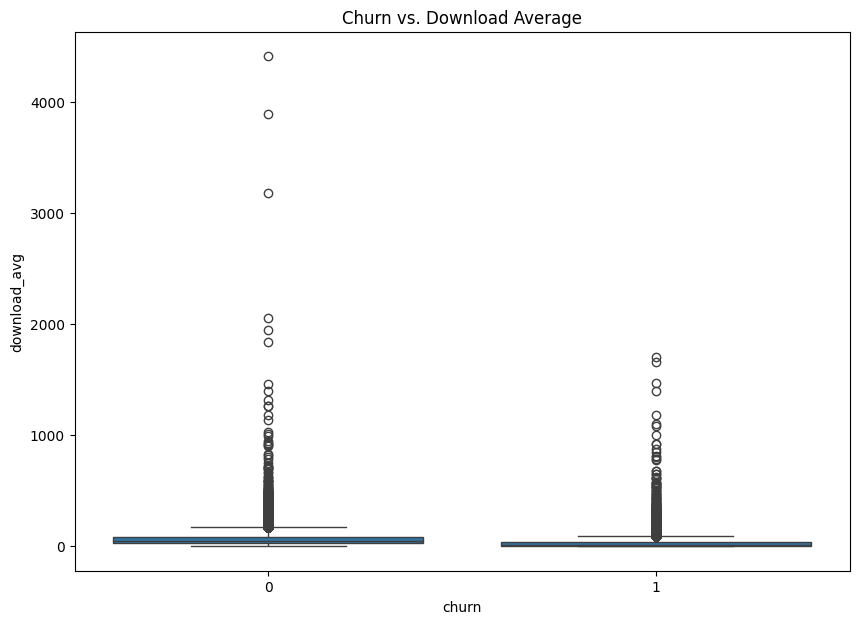

In [35]:
plt.figure(figsize=(10, 7))
sns.boxplot(x="churn", y="download_avg", data=df)
plt.title("Churn vs. Download Average")
plt.show()

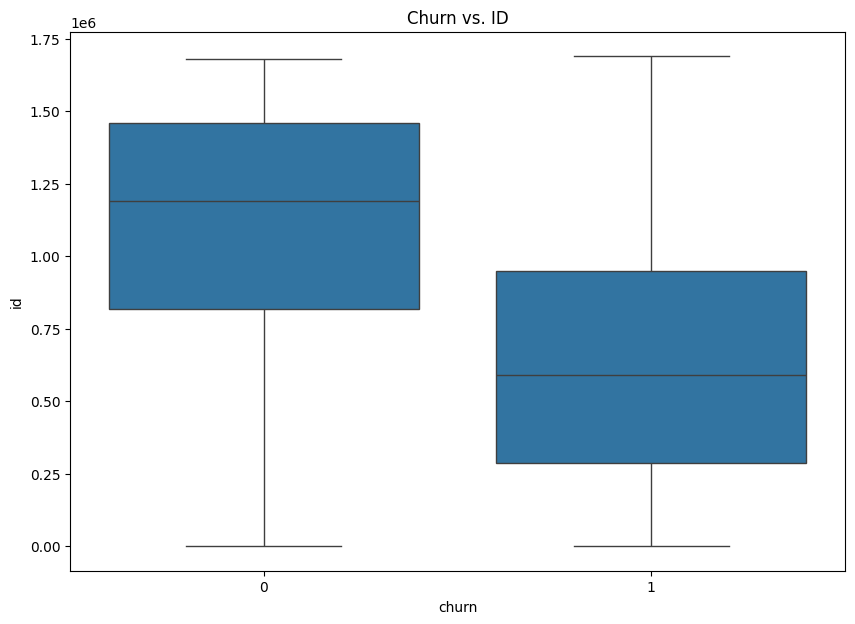

In [36]:
plt.figure(figsize=(10, 7))
sns.boxplot(x="churn", y="id", data=df)
plt.title("Churn vs. ID")
plt.show()

Insights from graphical analysis:
- The majority of customers are also using TV services (81.5%).
- The majority of customers do not use the movie package (66.5%).
- The average of subscription age is a little over 2 years, with a small number of customers using the services after 6 years.
- There are some heavy outliers for the bill average, this could mean they are using multiple packages or use multiple internet services (maybe for a business).
- A lot of customers do not have very long left in their contract, with a high number at zero. Maybe these are churned customers and the remaining values are still subscribed.
- Most customers experience few service issues but there are a notable amount of high instances. This could maybe be due to location or weather issues causing this.
- Download/upload average outliers are quite high with some values being extremely high. This could be an issue with data entry?
- Most customers do not go over the download limit, but there are some instances where this is an issue with up to 7 times with 504 customers.
- Customers that have left the service is slightly higher than ones who stay. There is not a very large class imbalance.
- ID (-0.5), subscription age (-0.6), TV subscribers (0.3), and remaining contract (0.3) have notable correlations with our target variable.
- Older customers seem to stay longer with the service, where new customers tend to leave more often. Maybe getting customers to stay with promotions and sales could keep these customers with the service longer.
- Customers that do not leave the service are TV subscribers, indicating that this is a popular service and a reason why customers stay.
- For some reason, the customer ID has a high correlation to churn. This could be because. We will need further investigation to determine if this value is worth keeping in the model.